In [1]:
import math
import numpy as np
import tensorflow as tf
#from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
from pandas import read_csv
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


2023-06-12 19:19:16.540284: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:19:16.572939: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-12 19:19:16.573736: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-12 19:19:17.193316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()
# get the dataset
def get_dataset():
    dataframe = pd.read_csv('RGB_Roze_train.csv')
    X = dataframe.iloc[:, :3].values.astype('float')
    y = dataframe.iloc[:, 3].values.astype('float')

    # Initialize the scaler
   # scaler_X = StandardScaler()
   # scaler_y = StandardScaler()
    
    # Standardize X and y
    X = scaler_X.fit_transform(X)
    y = scaler_y.fit_transform(y.reshape(-1,1)) # reshape needed because fit_transform expects 2D array
    print(scaler_X.mean_)  # prints array of means for all features
    print(scaler_X.scale_)  # prints array of standard deviations for all features
    print(scaler_y.mean_)  # prints mean for the target y
    print(scaler_y.scale_)  # prints standard deviation for the target y


    print(X.shape, y.shape)
    return X, y.ravel()  # ravel() is used to convert y back to 1D array



In [3]:
def train_model():
    x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3)
    x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.3)

    # create a NN with 2 layers of 16 neurons
    model = tf.keras.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(3,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    history = model.fit(x_train, y_train, epochs=250, validation_data=(x_validate, y_validate), verbose = 1)

    return model, x_train, y_train, history

In [4]:
x_values, y_values = get_dataset()

[3091.75369458 3551.8546798  2939.51970443]
[656.00715891 777.14169421 585.69440775]
[10400.55418719]
[2239.78743401]
(406, 3) (406, 1)


Epoch 1/250
7/7 [==============================] - 1s 20ms/step - loss: 0.4435 - mae: 0.4418 - val_loss: 0.2021 - val_mae: 0.2760
Epoch 2/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0865 - mae: 0.1482 - val_loss: 0.0126 - val_mae: 0.0465
Epoch 3/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0194 - mae: 0.0515 - val_loss: 0.0020 - val_mae: 0.0302
Epoch 4/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0059 - mae: 0.0310 - val_loss: 0.0118 - val_mae: 0.0488
Epoch 5/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0148 - mae: 0.0656 - val_loss: 0.0079 - val_mae: 0.0365
Epoch 6/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0082 - mae: 0.0417 - val_loss: 9.9989e-04 - val_mae: 0.0232
Epoch 7/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0028 - mae: 0.0286 - val_loss: 5.3342e-04 - val_mae: 0.0175
Epoch 8/250
7/7 [==============================] - 0s 4ms/step - loss: 0.0017 - mae: 0.0

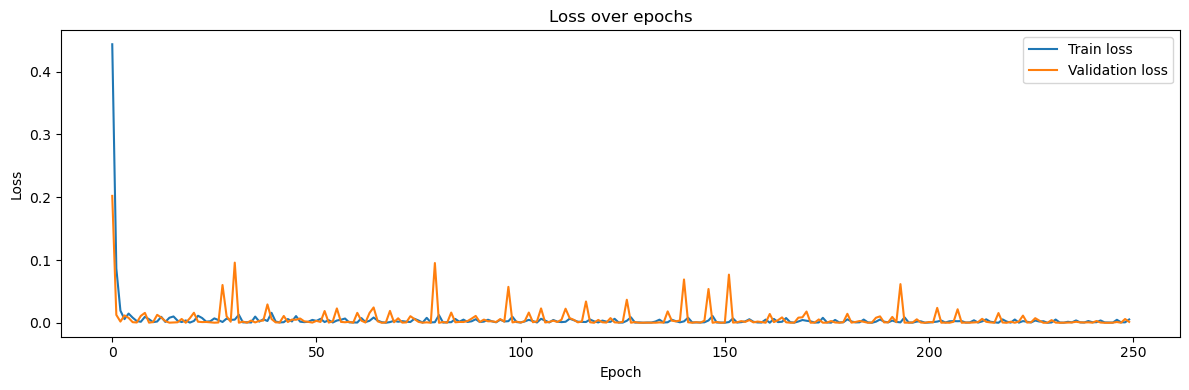

In [5]:
tf_model, x_train, y_train, history2 = train_model()

plt.figure(figsize=(12, 4))


plt.plot(history2.history['loss'], label='Train loss')
plt.plot(history2.history['val_loss'], label='Validation loss')
plt.title('Loss over epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.tight_layout()
plt.show()

In [6]:
tf_model.summary()
tf_model.save("moyModel")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                128       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

INFO:tensorflow:Assets written to: moyModel/assets


INFO:tensorflow:Assets written to: moyModel/assets


In [7]:
def calculate_mean_std(x_values):
    # Calculate mean and standard deviation for each feature
    mean = np.mean(x_values, axis=0)
    std_dev = np.std(x_values, axis=0)
    
    return mean, std_dev

In [8]:
mean, std_dev = calculate_mean_std(x_train)
for j in range(len(mean)):
    print(f"Feature {j} - Mean: {mean[j]}, Standard Deviation: {std_dev[j]}")


Feature 0 - Mean: 0.04673027711914628, Standard Deviation: 0.9032822917688704
Feature 1 - Mean: 0.024830523818817753, Standard Deviation: 0.9602583555505135
Feature 2 - Mean: 0.024533586568887676, Standard Deviation: 0.9520426951255995


In [9]:

def standardize_data(new_data_point, scaler_X):
    # Reshape new_data_point to 2D because scaler expects 2D inputs
    new_data_point = np.array(new_data_point).reshape(1, -1)
    standardized_data_point = scaler_X.transform(new_data_point)
    return standardized_data_point[0]  # return as 1D array

new_data_point = [3253,3737,3121]
standardized_data_point = standardize_data(new_data_point, scaler_X)

# Reshape it to 2D because the model expects 2D inputs
standardized_data_point_2D = np.array(standardized_data_point).reshape(1, -1)


# Predict the target value
Y_pred2 = tf_model.predict(standardized_data_point_2D)

# Inverse-transform the prediction
Y_pred_orig = scaler_y.inverse_transform(Y_pred2)

print(Y_pred_orig)


1/1 [==============================] - 0s 76ms/step
[[10973.777]]


In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
test_dataframe = pd.read_csv('RGB_Roze_test.csv')

X_test = test_dataframe.iloc[:, :3].values.astype('float')
Y_test = test_dataframe.iloc[:, 3].values.astype('float')

# Standardize X_test and Y_test
X_test = scaler_X.transform(X_test)
Y_test = scaler_y.transform(Y_test.reshape(-1,1))

# Remember to convert Y_test back to a 1D array if necessary
Y_test = Y_test.ravel()

1/1 [==============================] - 0s 15ms/step
[[0.25592768]]
5/5 [==============================] - 0s 900us/step
Mean Absolute Error: 0.0462111776080816
Mean Squared Error: 0.07233141036797779
5/5 [==============================] - 0s 1ms/step
Sekunde su  0.049651384353637695


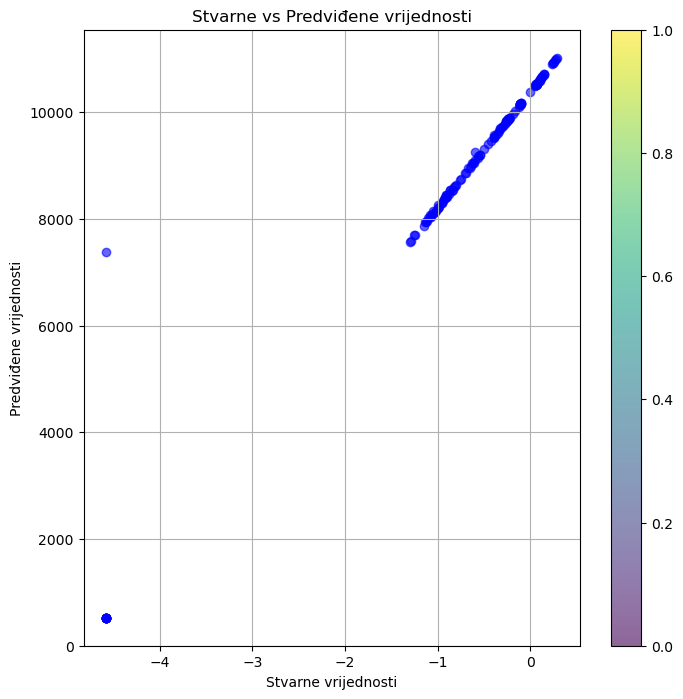

   Mean Absolute Error  Mean Squared Error
0             0.046211            0.072331


In [11]:
newX = tf.convert_to_tensor([standardized_data_point], dtype=tf.float32)
yhat = tf_model.predict(newX)
print(yhat)

# Predictions for the test set
Y_pred = tf_model.predict(X_test)

# Inverse-transform predictions
Y_pred_orig = scaler_y.inverse_transform(Y_pred)

mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)

print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)

import matplotlib.pyplot as plt
import seaborn as sns
import time as time

start_time = time.time()
# Calculate predictions for the test set
Y_pred = tf_model.predict(X_test)

end_time = time.time()

full_time = end_time - start_time
print("Sekunde su ", full_time)
# Inverse-transform predictions
Y_pred_orig = scaler_y.inverse_transform(Y_pred)

c="blue"
# Create a scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, Y_pred_orig, c=c, alpha=0.6)
plt.xlabel('Stvarne vrijednosti')
plt.ylabel('Predviđene vrijednosti')
plt.title('Stvarne vs Predviđene vrijednosti')
plt.grid(True)
plt.colorbar() # Show color scale
plt.show()


# Create a DataFrame for the metrics
metrics_df = pd.DataFrame(data=[[mae, mse]], 
                          columns=['Mean Absolute Error', 'Mean Squared Error'])

print(metrics_df)



In [12]:
from everywhereml.code_generators.tensorflow import tf_porter

In [13]:
porter = tf_porter(tf_model, x_train, y_train)
cpp_code = porter.to_arduino(instance_name='ColorRegressionNN_RGB_Roze', arena_size=4096)

print(cpp_code)

INFO:tensorflow:Assets written to: /tmp/tmp5p2rlniu/assets


INFO:tensorflow:Assets written to: /tmp/tmp5p2rlniu/assets


#ifndef UUID140010365625488
#define UUID140010365625488

#include <EloquentTinyML.h>
#include <eloquent_tinyml/tensorflow.h>

#ifdef __has_attribute
#define HAVE_ATTRIBUTE(x) __has_attribute(x)
#else
#define HAVE_ATTRIBUTE(x) 0
#endif
#if HAVE_ATTRIBUTE(aligned) || (defined(__GNUC__) && !defined(__clang__))
#define DATA_ALIGN_ATTRIBUTE __attribute__((aligned(4)))
#else
#define DATA_ALIGN_ATTRIBUTE
#endif

#ifndef ARENA_SIZE
#define ARENA_SIZE 4096
#endif

/** model size = 89260 bytes **/
const unsigned char modelData[] DATA_ALIGN_ATTRIBUTE = { 0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00, 0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x90, 0x00, 0x00, 0x00, 0xe8, 0x00, 0x00, 0x00, 0xa0, 0x51, 0x01, 0x00, 0xb0, 0x51, 0x01, 0x00, 0x58, 0x5c, 0x01, 0x00, 0x03, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00, 0x10, 0x00, 0x0c, 

2023-06-12 19:19:27.848348: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2023-06-12 19:19:27.848402: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2023-06-12 19:19:27.848790: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/tmp5p2rlniu
2023-06-12 19:19:27.849780: I tensorflow/cc/saved_model/reader.cc:89] Reading meta graph with tags { serve }
2023-06-12 19:19:27.849795: I tensorflow/cc/saved_model/reader.cc:130] Reading SavedModel debug info (if present) from: /tmp/tmp5p2rlniu
2023-06-12 19:19:27.853119: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:353] MLIR V1 optimization pass is not enabled
2023-06-12 19:19:27.854054: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2023-06-12 19:19:27.886434: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/tmp5p2rlniu
2023-06

In [14]:
#cpp_code = porter.to_arduino(instance_name='ColorRegressionNN_RGB', arena_size=4096)

# Specify the file path and name
file_path = 'ColorRegressionNNRoze.txt'

# Open the file in write mode
with open(file_path, 'w') as file:
    # Write the C++ code to the file
    file.write(cpp_code)

print(f"The C++ code has been saved to {file_path}")


The C++ code has been saved to ColorRegressionNNRoze.txt
